## Titanic Data Set - Kaggle 

In [2]:
#%notebook "C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/Titanic_Dataset"

In [3]:
# load initial packages 
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy import stats
#import pandas_profiling
import random

In [4]:
# load data sets and change to lowercase 

train = pd.read_csv("C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/train_model_data.csv")
train.columns = train.columns.str.lower() 

test = pd.read_csv("C:/Users/whitf/Documents/Python Scripts/my portfolio/kaggle/Titanic Machine Learning/all/test.csv")
test.columns = test.columns.str.lower() 

In [5]:
# plot with Matplotlib 
%matplotlib inline
rcParams['figure.figsize'] = 5,4 
sns.set_style('whitegrid')

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [7]:
train = train.loc[:,~train.columns.duplicated()] # remove duplicate index
train.describe()

,unnamed: 0,passengerid,survived,pclass,age,sibsp,parch,fare,age_imp_mean,age_imp_med,age_imp_interp,age_imp_samp,sex,ticket,embarked_imp
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118,29.361582,29.726061,29.358305,0.647587,338.528620,1.536476
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015,13.019697,13.902353,14.839822,0.477990,200.850657,0.791503
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.420000,0.420000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,22.000000,21.000000,20.000000,0.000000,158.500000,1.000000
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,28.000000,28.500000,28.000000,1.000000,337.000000,2.000000
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,35.000000,38.000000,38.000000,1.000000,519.500000,2.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000,80.000000,80.000000,80.000000,1.000000,680.000000,2.000000


## Imbalance Dataset 

Explore options to mitigate having an imbalanced dataset with survivors at 0.38 and non-survivors at 0.62 (Referencing an analysis of the target in 'Titanic_Dataset - Part I Data Understanding and Data Quality').  

In [8]:
# relative frequency of survived
train['survived'].value_counts(normalize=True).round(3)


0    0.616
1    0.384
Name: survived, dtype: float64

## Single Decision Tree

###### Cross Validation: Traditional Train and Validation 80/20 Split

Use train and validation for obtaining optimal parameters. 

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score

In [10]:
y = train['survived'].values
X = pd.DataFrame(train, columns=['pclass','sex','age_imp_samp','fare','sibsp','parch','embarked_imp'])

# train test splits 
X_train, X_valid, y_train, y_valid = train_test_split(X, y,     
test_size=0.2, random_state=46)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(712, 7)
(712,)
(179, 7)
(179,)


Observe whether the target mean of train and validation are noticeably different. 

The difference in means of each group quantifies the absolute difference in the mean value. Train and validation are  approximately similar at 0.38 and 0.42 respectively. This signifies an adequate split.  

In [11]:
# What are the mean differences between groups?
print(y_train.mean().round(2))
print(y_valid.mean().round(2))

0.38
0.42



####  Model: Single Decision Tree 

In [12]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,accuracy_score 

In [13]:
param_grid = {'max_depth': np.arange(3, 10)} 

single_tree = GridSearchCV(DecisionTreeClassifier(random_state = 55), param_grid)

single_tree_fit = single_tree.fit(X_train, y_train)
single_tree_pred = single_tree_fit.predict(X_valid)
single_tree_probs = single_tree_fit.predict_proba(X_valid)


#### Classification Metrics

In [14]:
from sklearn.metrics import roc_auc_score
import scikitplot as skplt
from sklearn.metrics import log_loss

#####################################################
#        Create Evaluation Function
#####################################################

def class_metrics(test,predict,prob):
    skplt.metrics.plot_confusion_matrix(test, predict, normalize=True) # Confusion Matrix 
    plt.show() 
    print('\n')
    print('Classification Report:','\n', classification_report(test, predict)) # Classification Report 
    print('\n')
    skplt.metrics.plot_roc(test,prob)
    print('\n')
    print( 'Accuracy:', accuracy_score(test, predict).round(3))  # Accuracy 
    print('AUC:', roc_auc_score(test, predict).round(3))   # AUC 
    model = log_loss(test, predict)
    print('Log Loss:', model.round(3))  # Log Loss


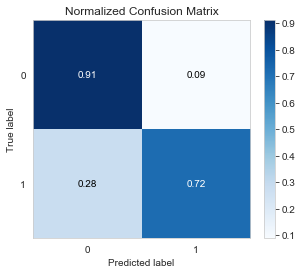



Classification Report: 
              precision    recall  f1-score   support

          0       0.82      0.91      0.86       104
          1       0.86      0.72      0.78        75

avg / total       0.83      0.83      0.83       179





Accuracy: 0.832
AUC: 0.817
Log Loss: 5.789


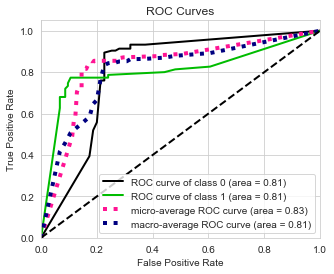

In [15]:
class_metrics(y_valid, single_tree_pred,single_tree_probs)

## Optimized Single Decision Tree

#### Grid Search and 5-Folds Cross Validation

optimize parameters

In [51]:
# set of parameters to test
tree_grid = {"criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5, 7],
              "max_depth": [2, 5, 7],
              "min_samples_leaf": [1, 3, 5],
              "max_leaf_nodes": [None, 3 ,5 ,7],
              }

single_tree = DecisionTreeClassifier()  
grid_search = GridSearchCV(single_tree, tree_grid, cv=5, verbose=1)

grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=1)]: Done 1080 out of 1080 | elapsed:    4.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 5, 7], 'max_depth': [2, 5, 7], 'min_samples_leaf': [1, 3, 5], 'max_leaf_nodes': [None, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [52]:
print("Best Accuracy", grid_search.best_score_) 

Best Accuracy 0.827247191011236


In [53]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')



####  Model: Optimized Single Decision Tree 

In [72]:
best_tree = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                                      max_features=None, max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      min_samples_leaf=5, min_samples_split=5,
                                      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
                                      splitter='best')

In [73]:
best_tree_fit = best_tree.fit(X_train,y_train)
best_tree_pred = best_tree_fit.predict(X_valid)
best_tree_probs = best_tree_fit.predict_proba(X_valid) 


#### Classification Metrics

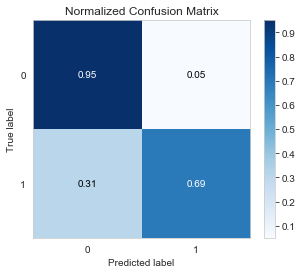



Classification Report: 
              precision    recall  f1-score   support

          0       0.81      0.95      0.88       104
          1       0.91      0.69      0.79        75

avg / total       0.85      0.84      0.84       179





Accuracy: 0.844
AUC: 0.823
Log Loss: 5.403


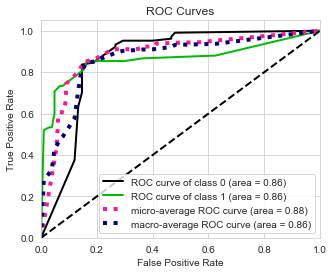

In [74]:
class_metrics(y_valid, best_tree_pred,best_tree_probs)

## Optimized Logistic Regression

#### Grid Search and 5-Folds Cross Validation

Optimized Parameters

In [75]:
from sklearn.linear_model import LogisticRegression

# set of parameters to test
log_grid = {"penalty": ["l1","l2"],
            "C": [1, 2, 6, 8, 10]
            }

log_reg = LogisticRegression() #instantiate the model with default parameters
log_grid_search = GridSearchCV(log_reg, log_grid, cv=5, verbose=1)
log_grid_search.fit(X_train, y_train) #fit model 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [1, 2, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [76]:
print("Best Accuracy", log_grid_search.best_score_) 

Best Accuracy 0.7935393258426966


In [77]:
print(log_grid_search.best_estimator_)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


#### Model: Optimized Logistic Regression

In [78]:
best_log_reg = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
best_log_reg_fit = best_log_reg.fit(X_train,y_train)
best_log_pred = best_log_reg_fit.predict(X_valid)
best_log_probs = best_log_reg_fit.predict_proba(X_valid) 

#### Classification Metrics

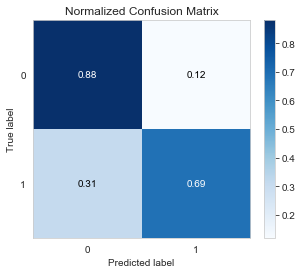



Classification Report: 
              precision    recall  f1-score   support

          0       0.80      0.88      0.84       104
          1       0.81      0.69      0.75        75

avg / total       0.81      0.80      0.80       179





Accuracy: 0.804
AUC: 0.789
Log Loss: 6.753


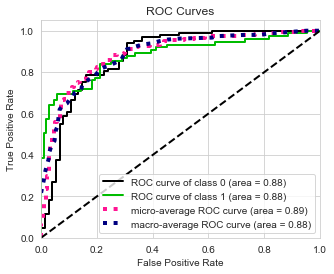

In [80]:
class_metrics(y_valid, best_log_pred,best_log_probs)

### AdaBoost Model

In [22]:
#adaboost 
# Load libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

#adaboost 
trees = DecisionTreeClassifier(max_depth =2)

adaboost_model_1 = AdaBoostClassifier (
    base_estimator= trees,
    n_estimators=250,
    learning_rate=1.5,
    algorithm='SAMME',random_state = 55)
 
    
#print(adaboost_model_1)

#### Cross Validation: Stratified K-Fold

In [25]:
from sklearn.model_selection import StratifiedShuffleSplit
# StratifiedShuffleSplit is a variation of ShuffleSplit, which returns stratified splits, i.e which creates splits 
# by preserving the same percentage for each target class as in the complete set.

# Use all training data 
skf = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=46)
print('Mean Accuracy:',np.mean(cross_val_score(adaboost_model_1, X, y, cv=skf, scoring='accuracy')).round(3))
print('Mean AUC:',np.mean(cross_val_score(adaboost_model_1, X, y, cv=skf, scoring='roc_auc')).round(3))
print('Mean Log Loss:',np.mean(cross_val_score(adaboost_model_1, X, y, cv=skf, scoring='neg_log_loss')).round(3))



Mean Accuracy: 0.816
Mean AUC: 0.874
Mean Log Loss: -0.679


#### Grid Search: Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.grid_search import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop =500, num = 10)]
# Number of features to consider at every split
max_features = 'auto' # ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 5, 10, None]  # [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True] #[True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
              # 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]}


In [65]:
rfc = RandomForestClassifier(n_jobs=-1, oob_score = True) 
rf_random  = GridSearchCV(estimator=rfc, param_grid=random_grid, cv=5)

In [76]:
# Fit the random search model
random_forest_model = rf_random.fit(X_train, y_train)
print(random_forest_model)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 233, 266, 300, 333, 366, 400, 433, 466, 500], 'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)


In [67]:
random_forest_model.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 433}

### Use Best Parameters: Random Forest

In [68]:
#randomforest
rf_classifier = RandomForestClassifier(bootstrap=True,max_depth=10, min_samples_leaf=1, 
                                       min_samples_split=2, n_estimators=433, random_state=46, verbose=0, warm_start=False)                        
                                      
                          

In [69]:
#fit 
rf_model_best = rf_classifier.fit(X_train, y_train)

In [70]:
rf_best = rf_model_best.predict(X_valid)

In [147]:
print(confusion_matrix(y_valid, rf_best))
print( 'Accuracy:', accuracy_score(y_valid,rf_best).round(3))
#print('AUC:', roc_auc_score(y_valid,y_default_best).round(3))

[[94 10]
 [19 56]]
Accuracy: 0.838


In [72]:
#predictions 
# 2nd column represents the probability of survived
rf_pred = rf_model_best.predict_proba(X_valid)
rf_pred[:10]

array([[0.93500549, 0.06499451],
       [0.24481393, 0.75518607],
       [0.88916822, 0.11083178],
       [0.51848516, 0.48151484],
       [0.76337747, 0.23662253],
       [0.89828271, 0.10171729],
       [0.67647021, 0.32352979],
       [0.90473297, 0.09526703],
       [0.85907801, 0.14092199],
       [0.88856646, 0.11143354]])

In [80]:
print ("AUC for best Random Forest Model:" ,metrics.roc_auc_score(y_valid, rf_pred[:,1]).round(3))# display the relative importance of each attribute


AUC for best Random Forest Model: 0.894


In [81]:
# display the relative importance of each attribute
print(rf_model_best.feature_importances_)

[0.09907454 0.29143658 0.22706576 0.24637239 0.0550243  0.04495979
 0.03606662]


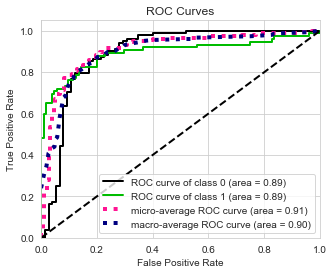

In [74]:
#print(predictions)
skplt.metrics.plot_roc_curve(y_valid, rf_pred)
plt.show()

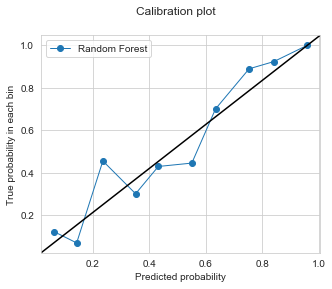

In [79]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.calibration import calibration_curve

rf_y, rf_x = calibration_curve(y_valid, rf_pred[:,1], n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(rf_x,rf_y, marker='o', linewidth=1, label='Random Forest')

# plot perfectly calibrated
# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

In [78]:
from sklearn.metrics import log_loss
# Log Loss Score:  A model with perfect skill has a log loss score of 0.0. Reported as the
# average log loss across the predictions in a test dataset.
# keep the predictions for class 1 only
probs = rf_pred[:,1]
# calculate log loss
loss = log_loss(y_valid, probs)
print(loss)

0.38869943197593415


Single Decision Tree 

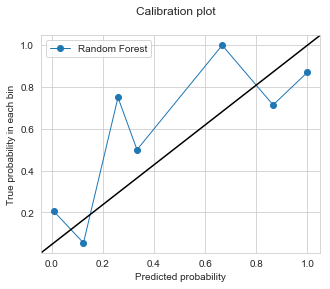

In [200]:
#%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from sklearn.calibration import calibration_curve

tree_y, tree_x = calibration_curve(y_valid, single_tree_probs, n_bins=10)

fig, ax = plt.subplots()
# only these two lines are calibration curves
plt.plot(tree_x,tree_y, marker='o', linewidth=1, label='Random Forest')

# plot perfectly calibrated
# reference line, legends, and axis labels
line = mlines.Line2D([0, 1], [0, 1], color='black')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
fig.suptitle('Calibration plot')
ax.set_xlabel('Predicted probability')
ax.set_ylabel('True probability in each bin')
plt.legend()
plt.show()

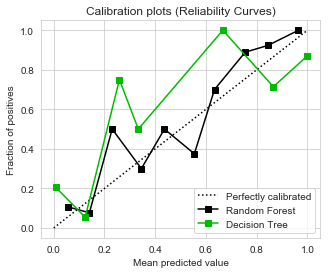

In [201]:
probas_list = [rf_pred[:,1], single_tree_probs]
clf_names = ['Random Forest', 'Decision Tree']
skplt.metrics.plot_calibration_curve(y_valid,
                                      probas_list,
                                      clf_names)

In [ ]:
Naive Bayes Classifier 

In [217]:
from sklearn.naive_bayes import GaussianNB

#Naive Bayes Classifier
nb = GaussianNB()
nb.model = nb.fit(X_train,y_train)
nb_pred = nb.predict(X_valid)
nb_probs = nb.model.predict_proba(X_valid)[:, 1]

print(accuracy_score(y_valid, nb_pred, normalize = True))
print ("AUC for Naive Bayes Model:" ,metrics.roc_auc_score(y_valid, nb_probs).round(3))# display the relative importance of each attribute


0.7877094972067039
AUC for Naive Bayes Model: 0.821


#### Test / Unseen Data

###### Test Data Set Preprocessing 

In [ ]:
test['age_imp_samp'] = test['age'] # create new variable 
isnull = test.age_imp_samp.isnull() # identify missing 
sample = test.age_imp_samp.dropna().sample(isnull.sum(), replace=True,random_state=2).values # bootstrap replacement method
test.loc[isnull, 'age_imp_samp'] = sample 


In [ ]:
# Be conservative and use the mode to replace the missingness or add a new category for missing values. 
test['embarked_imp'] = test['embarked'].replace(np.nan,'S')
test['embarked_imp'].isnull().sum()

In [ ]:
test['fare_imp_samp'] = test['fare'] # create new variable 
isnull = test.fare_imp_samp.isnull() # identify missing 
sample = test.fare_imp_samp.dropna().sample(isnull.sum(), replace=True,random_state=2).values # bootstrap replacement method
test.loc[isnull, 'fare_imp_samp'] = sample 

In [ ]:
# How do you prepare the data for modeling? 
# select all categorical predictors and encode (LabelEncoder) like factoring in R
test_categorical = test.select_dtypes(include = ['object'])
test_categorical = test_categorical.drop(columns=['name','cabin', 'embarked'])
test_categorical.head()

In [ ]:
lab = preprocessing.LabelEncoder()
test_categorical = test_categorical.apply(lab.fit_transform)

In [ ]:
test = test.drop(test_categorical.columns, axis=1)
test = pd.concat([test,test_categorical],axis=1)

In [ ]:
test.info()

In [ ]:
#X_test.isnull().sum()

In [ ]:
# unseen data / test set
X_test = pd.DataFrame(test, columns=['pclass','sex','age_imp_samp','fare_imp_samp','sibsp','parch','embarked_imp'])
pred  = adaboost_model_1.predict_proba(X_test)
pred[:10]